In [1]:
# pip install pymannkendall

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF
import numpy as np
from sklearn.metrics import r2_score
import pymannkendall as mk

In [3]:
data = yf.download("USDTRY=X", period = "5Y", interval = "1mo")

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-01,5.18030,5.34130,5.17633,5.30937,5.30937,0
2019-03-01,5.34081,5.84280,5.30340,5.58320,5.58320,0
2019-04-01,5.58887,5.98197,5.43753,5.94890,5.94890,0
2019-05-01,5.96500,6.24390,5.81680,5.91250,5.91250,0
2019-06-01,5.91210,5.93100,5.66530,5.77180,5.77180,0


In [5]:
data = data[["Close"]]
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Close
Date,
2019-02-01,5.30937
2019-03-01,5.58320
2019-04-01,5.94890
2019-05-01,5.91250
2019-06-01,5.77180


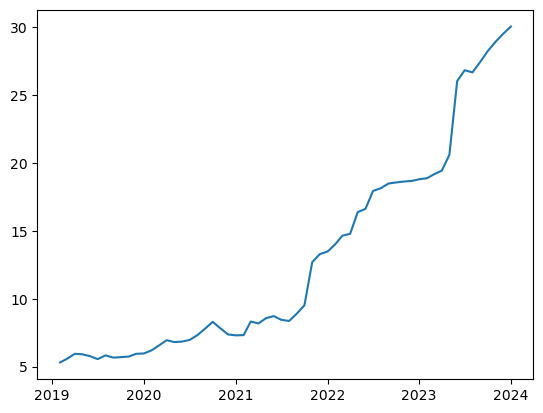

In [7]:
plt.plot(data)
plt.show();

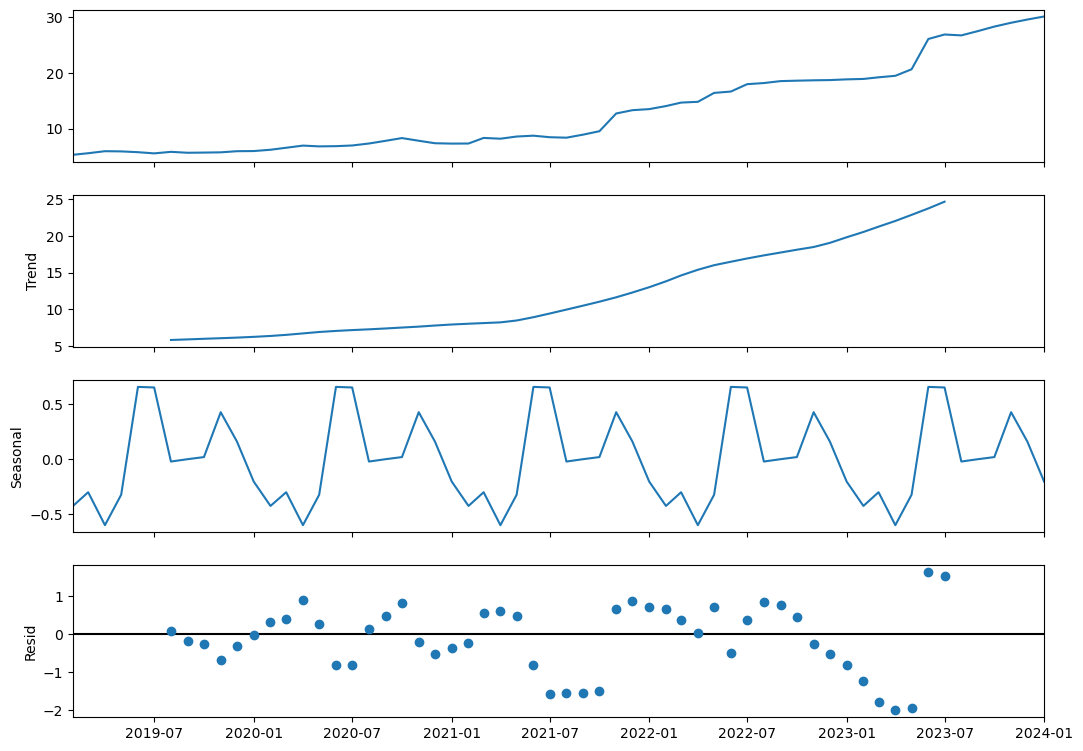

In [8]:
s = seasonal_decompose(data)
figure = s.plot()
figure.set_figwidth(12)
figure.set_figheight(8)
plt.show();

In [9]:
hareketli_ortalama = data.rolling(12, center = True).mean()

In [10]:
t = s.trend

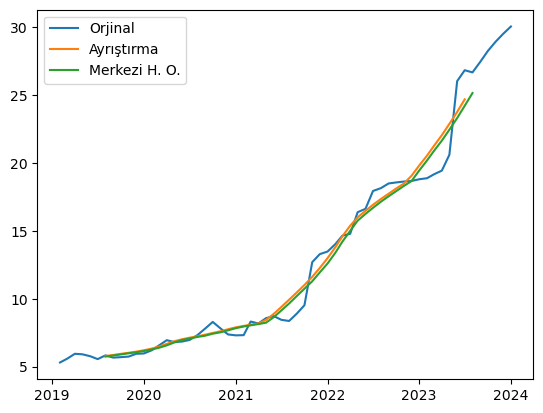

In [11]:
plt.plot(data, label = "Orjinal")
plt.plot(t, label = "Ayrıştırma")
plt.plot(hareketli_ortalama, label = "Merkezi H. O.")
plt.legend()
plt.show();

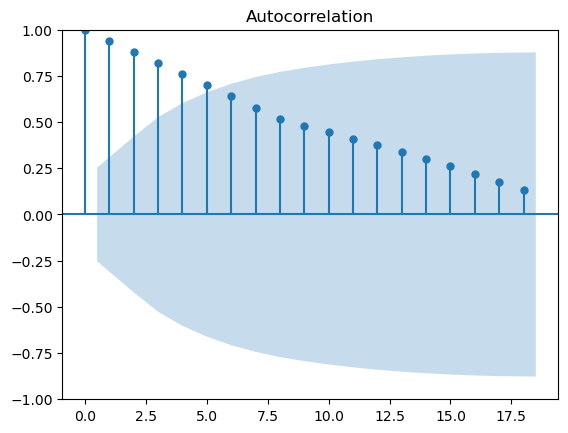

In [12]:
# Otokorelasyon

plot_acf(data)
plt.show();

In [13]:
# Unit root test

dur = ADF(data)
dur

Test Statistic,2.059
P-value,0.999
Lags,0


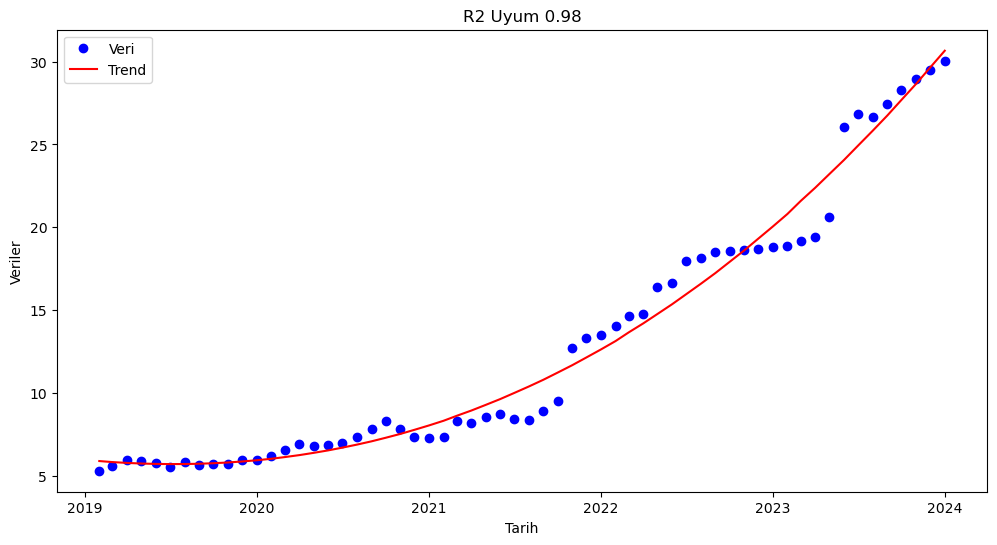

In [14]:
# regresyon ile

x = np.arange(len(data))
y = data["Close"]

katsayı = np.polyfit(x, y, 3)
polfonk = np.poly1d(katsayı)
trend = polfonk(x)
r2 = r2_score(y, trend)

plt.figure(figsize = (12,6))
plt.plot(data.index, y, "bo", label = "Veri")
plt.plot(data.index, trend, "r-", label = "Trend")
plt.xlabel("Tarih")
plt.ylabel("Veriler")
plt.legend()
plt.title(f"R2 Uyum {round(r2,2)}")
plt.show();

In [15]:
# Mann Kendall Test

# H0: Süreç içerisinde trend yoktur.
# H1: Süreç trend barındırır.

mkt = mk.original_test(data)
print(mkt)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.695785325482817, Tau=0.9480225988700565, s=1678.0, var_s=24583.333333333332, slope=0.3755962487423059, intercept=-2.4303896499402597)


In [16]:
# Mevsimsellikten arındırdıktan sonra

s = seasonal_decompose(data)
mkt = mk.original_test(s.trend)
print(mkt)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.016821484913653, Tau=1.0, s=1128.0, var_s=12658.666666666666, slope=0.40597920312582836, intercept=-2.309945071497875)


In [17]:
data2 =  yf.download("^VIX", period = "1Y", interval = "1d")[["Close"]]
data2.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2023-01-12,18.830000
2023-01-13,18.350000
2023-01-17,19.360001
2023-01-18,20.340000
2023-01-19,20.520000


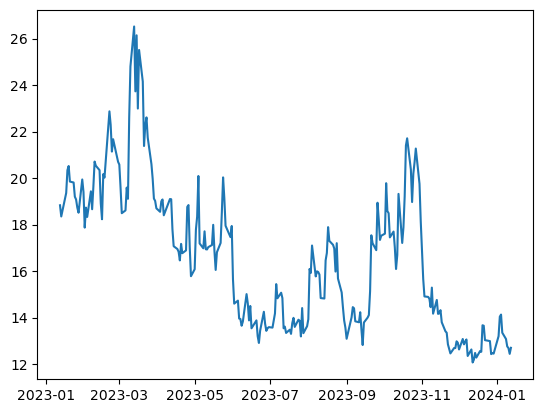

In [18]:
plt.plot(data2);

In [19]:
mkt = mk.original_test(data2)
print(mkt)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-11.574124472094857, Tau=-0.48947068867387594, s=-15480.0, var_s=1788584.6666666667, slope=-0.02796608714734094, intercept=20.28474450919588)
